In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

In [3]:
sns.set()
sns.set_theme(style="whitegrid")

In [4]:
iris_data = load_iris()
display(iris_data['feature_names'])
display(iris_data['target_names'])

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

<h3>[Problem 1] Select features and categories for practice<h3>

In [5]:
iris_df = pd.DataFrame({
        'sepal_length': iris_data['data'][:, 0], 
        'petal_length': iris_data['data'][:, 2], 
        'Species': iris_data['target']
        })
        
display(iris_df)

,sepal_length,petal_length,Species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


In [6]:
iris_practice_data = iris_df[iris_df['Species'] > 0]
display(iris_practice_data)

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


<h3>[Problem 2] Data analysis</h3>

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

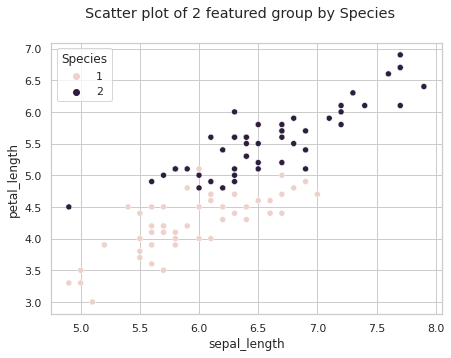

In [7]:
fig, axes = plt.subplots(1, 1, figsize=(7, 5), sharey=True)
fig.suptitle('Scatter plot of 2 featured group by Species')

sns.scatterplot(
        data=iris_practice_data, 
        x=iris_practice_data['sepal_length'],
        y=iris_practice_data['petal_length'], 
        hue='Species',
        ax = axes)

Text(0.5, 1.0, 'petal_length')

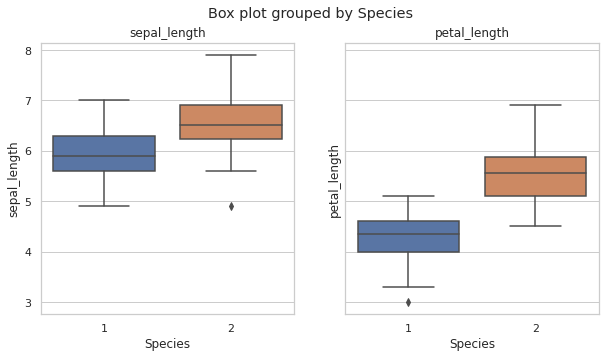

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
fig.suptitle('Box plot grouped by Species')

sns.boxplot(data=iris_practice_data, x='Species', y='sepal_length', ax=axes[0])
axes[0].set_title('sepal_length')

sns.boxplot(data=iris_practice_data, x='Species', y='petal_length', ax=axes[1])
axes[1].set_title('petal_length')

Text(0.5, 1.0, 'petal_length')

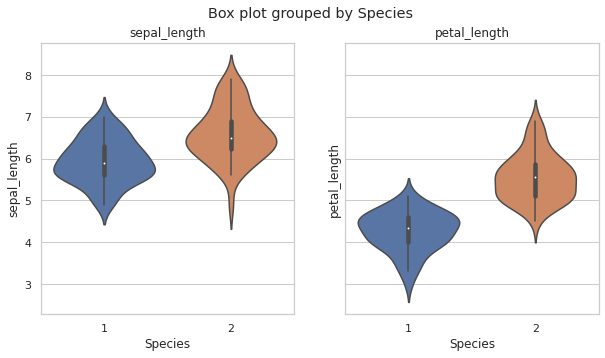

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
fig.suptitle('Box plot grouped by Species')

sns.violinplot(data=iris_practice_data, x='Species', y='sepal_length', ax=axes[0])
axes[0].set_title('sepal_length')

sns.violinplot(data=iris_practice_data, x='Species', y='petal_length', ax=axes[1])
axes[1].set_title('petal_length')

<h3>[Problem 3] Division of preprocessing/training data and verification data</h3>

In [10]:
sepal_length_ndarray = np.array(np.array(iris_practice_data['sepal_length'])).reshape(100, 1)
petal_length_ndarray = np.array(np.array(iris_practice_data['petal_length'])).reshape(100, 1)

X = np.concatenate((sepal_length_ndarray, petal_length_ndarray), axis=1)
y = np.array(iris_practice_data['Species'])

display(X[0:5])
display(y[0:5])

array([[7. , 4.7],
       [6.4, 4.5],
       [6.9, 4.9],
       [5.5, 4. ],
       [6.5, 4.6]])

array([1, 1, 1, 1, 1])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

display(X_train.shape)
display(X_train[0:5])
display(X_test.shape)
display(X_test[0:5])
display(y_train.shape)
display(y_train[0:5])
display(y_test.shape)
display(y_test[0:5])

(75, 2)

array([[5.6, 3.6],
       [6.1, 4. ],
       [6. , 4. ],
       [6.7, 5.8],
       [6.4, 5.6]])

(25, 2)

array([[7.4, 6.1],
       [7.2, 5.8],
       [6.6, 4.4],
       [6.7, 4.4],
       [5.5, 4. ]])

(75,)

array([1, 1, 1, 2, 2])

(25,)

array([2, 2, 1, 1, 1])

<h3>[Problem 4] Pretreatment/Standardization</h3>

In [12]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_standardized = scaler.transform(X_train)
X_test_standardized = scaler.transform(X_test)

print(scaler.mean_)
display(X_train_standardized[0:5])
display(X_test_standardized[0:5])

[6.232 4.868]


array([[-0.97391184, -1.55168603],
       [-0.20341197, -1.06219517],
       [-0.35751194, -1.06219517],
       [ 0.72118788,  1.14051371],
       [ 0.25888796,  0.89576828]])

array([[ 1.7998877 ,  1.50763185],
       [ 1.49168775,  1.14051371],
       [ 0.56708791, -0.57270431],
       [ 0.72118788, -0.57270431],
       [-1.12801181, -1.06219517]])

<h3>[Problem 5] Learning and estimation</h3>

In [13]:
def k_neigh_classifier(k_neighbors = 5):
    neigh = KNeighborsClassifier(n_neighbors=k_neighbors)
    neigh.fit(X_train_standardized, y_train)
    neigh_predict = neigh.predict(X_test_standardized)
    print("k_neighbors = {}".format(k_neighbors))
    print("Prediction: \n{}".format(neigh_predict))
    print("Truth: \n{}".format(y_test))
    print("Differences: \n{}\n".format(neigh_predict - y_test))

    return neigh_predict

In [14]:
k_neigh_ndarray = np.array([1, 3, 5, 20])
y_pred_neigh_ndarray = []

In [15]:
for k_neighbors in k_neigh_ndarray:
    y_pred_neigh_ndarray.append(k_neigh_classifier(k_neighbors))

k_neighbors = 1
Prediction: 
[2 2 1 1 1 1 2 1 2 2 1 1 2 1 1 1 1 2 1 1 1 2 2 1 2]
Truth: 
[2 2 1 1 1 1 2 1 2 2 1 2 2 1 1 1 1 2 1 1 1 2 2 2 2]
Differences: 
[ 0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0 -1
  0]

k_neighbors = 3
Prediction: 
[2 2 1 1 1 1 2 1 2 2 1 2 2 1 1 1 1 2 1 1 1 2 2 1 2]
Truth: 
[2 2 1 1 1 1 2 1 2 2 1 2 2 1 1 1 1 2 1 1 1 2 2 2 2]
Differences: 
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
  0]

k_neighbors = 5
Prediction: 
[2 2 1 1 1 1 2 1 2 2 1 2 2 1 1 1 1 2 1 1 1 2 2 1 2]
Truth: 
[2 2 1 1 1 1 2 1 2 2 1 2 2 1 1 1 1 2 1 1 1 2 2 2 2]
Differences: 
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
  0]

k_neighbors = 20
Prediction: 
[2 2 1 1 1 1 2 1 2 2 1 2 2 1 1 1 1 2 1 1 1 2 2 2 2]
Truth: 
[2 2 1 1 1 1 2 1 2 2 1 2 2 1 1 1 1 2 1 1 1 2 2 2 2]
Differences: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]



In [16]:
y_pred_neigh_ndarray

[array([2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
        2, 1, 2]),
 array([2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
        2, 1, 2]),
 array([2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
        2, 1, 2]),
 array([2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
        2, 2, 2])]

<h3>[Problem 6] Evaluation</h3>

<h4>Calculate 4 types of indicators using scikit-learn</h4>

In [17]:
precision_score_ndarray = []
accuracy_score_ndarray = []
recall_score_ndarray = []
f1_score_ndarray = []

for y_pred_neigh in y_pred_neigh_ndarray:
    precision_score_ndarray.append(metrics.precision_score(y_test, y_pred_neigh))
    accuracy_score_ndarray.append(metrics.accuracy_score(y_test, y_pred_neigh))
    recall_score_ndarray.append(metrics.recall_score(y_test, y_pred_neigh))
    f1_score_ndarray.append(metrics.f1_score(y_test, y_pred_neigh))

In [18]:
neigh_score = pd.DataFrame({
        'k_neighbors': k_neigh_ndarray,
        'Accuracy': accuracy_score_ndarray,
        'Precision': precision_score_ndarray,
        'Recall': recall_score_ndarray,
        'F1': f1_score_ndarray
})

print("Positive: label 1")
display(neigh_score)

Positive: label 1


,k_neighbors,Accuracy,Precision,Recall,F1
0,1,0.92,0.866667,1.0,0.928571
1,3,0.96,0.928571,1.0,0.962963
2,5,0.96,0.928571,1.0,0.962963
3,20,1.00,1.000000,1.0,1.000000


<h4>Display the confusion matrix using scikit-learn</h4>

In [19]:
print("Confusion matrix\n")
for i in range(0, k_neigh_ndarray.size):
    print("k_neighbors = {}\n {}\n".format(k_neigh_ndarray[i], metrics.confusion_matrix(y_test, y_pred_neigh_ndarray[i])))

Confusion matrix

k_neighbors = 1
 [[13  0]
 [ 2 10]]

k_neighbors = 3
 [[13  0]
 [ 1 11]]

k_neighbors = 5
 [[13  0]
 [ 1 11]]

k_neighbors = 20
 [[13  0]
 [ 0 12]]



<h4>Briefly research and summarize in writing the meaning of the four types of index values.</h4>

- Accuracy: the ratio of correctly matched predition cases over all truth cases
- Precision: the ratio of true positive over all prediction cases that are positive
- Recall: The ratio of true positive over all truth cases that are positive
- F1: F1 = 2 x (precision x recall) / (precision + recall)

<h3>[Problem 7] Visualization</h3>

In [20]:
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

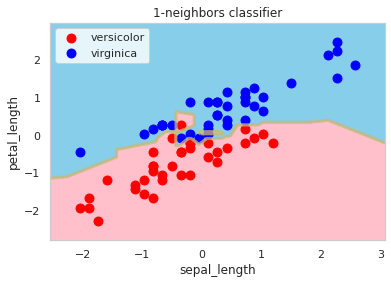

In [21]:
k_neighbors = 1
decision_region(
    X_train_standardized, 
    y_train, 
    KNeighborsClassifier(n_neighbors=k_neighbors).fit(X_train_standardized, y_train), 
    title="{}-neighbors classifier".format(k_neighbors), 
    xlabel="sepal_length", 
    ylabel="petal_length"
)

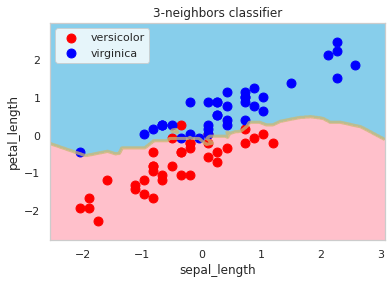

In [22]:
k_neighbors = 3
decision_region(
    X_train_standardized, 
    y_train, 
    KNeighborsClassifier(n_neighbors=k_neighbors).fit(X_train_standardized, y_train), 
    title="{}-neighbors classifier".format(k_neighbors), 
    xlabel="sepal_length", 
    ylabel="petal_length"
)

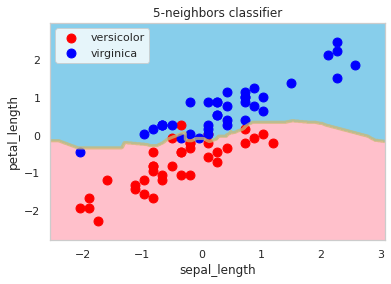

In [23]:
k_neighbors = 5
decision_region(
    X_train_standardized, 
    y_train, 
    KNeighborsClassifier(n_neighbors=k_neighbors).fit(X_train_standardized, y_train), 
    title="{}-neighbors classifier".format(k_neighbors), 
    xlabel="sepal_length", 
    ylabel="petal_length"
)

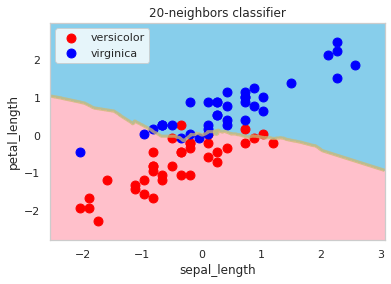

In [24]:
k_neighbors = 20
decision_region(
    X_train_standardized, 
    y_train, 
    KNeighborsClassifier(n_neighbors=k_neighbors).fit(X_train_standardized, y_train), 
    title="{}-neighbors classifier".format(k_neighbors), 
    xlabel="sepal_length", 
    ylabel="petal_length"
)

<h3>[Problem 8] Learning by other methods</h3>

<h4>Logistic regression</h4>

In [25]:
lr = LogisticRegression(random_state=0).fit(X_train_standardized, y_train)
lr_predict = lr.predict(X_test_standardized)

print("Prediction: \n{}".format(lr_predict))
print("Truth: \n{}".format(y_test))
print("Differences: \n{}\n".format(lr_predict - y_test))

Prediction: 
[2 2 1 1 1 1 2 1 2 2 1 2 2 1 1 1 1 2 1 1 1 2 2 2 2]
Truth: 
[2 2 1 1 1 1 2 1 2 2 1 2 2 1 1 1 1 2 1 1 1 2 2 2 2]
Differences: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]



In [26]:
lr_score = pd.DataFrame({
        'Accuracy': [metrics.accuracy_score(y_test, lr_predict)],
        'Precision': [metrics.precision_score(y_test, lr_predict)],
        'Recall': [metrics.recall_score(y_test, lr_predict)],
        'F1': [metrics.f1_score(y_test, lr_predict)]
})

display(lr_score)
display(metrics.confusion_matrix(y_test, lr_predict))

,Accuracy,Precision,Recall,F1
0,1.0,1.0,1.0,1.0


array([[13,  0],
       [ 0, 12]])

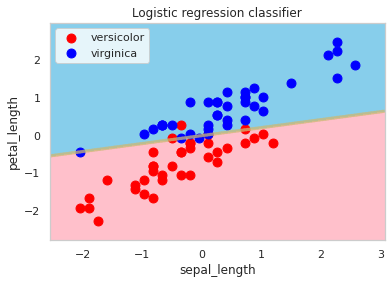

In [27]:
decision_region(
    X_train_standardized, 
    y_train, 
    lr, 
    title="Logistic regression classifier", 
    xlabel="sepal_length", 
    ylabel="petal_length"
)

<h3>SVM</h3>

In [28]:
svc = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(X_train_standardized, y_train)
svc_predict = svc.predict(X_test_standardized)

print("Prediction: \n{}".format(svc_predict))
print("Truth: \n{}".format(y_test))
print("Differences: \n{}\n".format(svc_predict - y_test))

Prediction: 
[2 2 1 1 1 1 2 1 2 2 1 2 2 1 1 1 1 2 1 1 1 2 2 2 2]
Truth: 
[2 2 1 1 1 1 2 1 2 2 1 2 2 1 1 1 1 2 1 1 1 2 2 2 2]
Differences: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]



In [29]:
svc_score = pd.DataFrame({
        'Accuracy': [metrics.accuracy_score(y_test, svc_predict)],
        'Precision': [metrics.precision_score(y_test, svc_predict)],
        'Recall': [metrics.recall_score(y_test, svc_predict)],
        'F1': [metrics.f1_score(y_test, svc_predict)]
})

display(svc_score)
display(metrics.confusion_matrix(y_test, svc_predict))

,Accuracy,Precision,Recall,F1
0,1.0,1.0,1.0,1.0


array([[13,  0],
       [ 0, 12]])

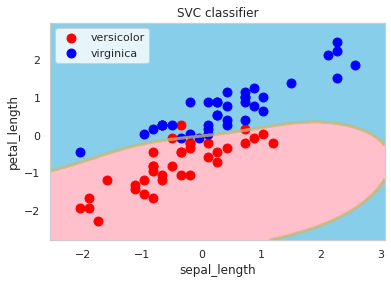

In [30]:
decision_region(
    X_train_standardized, 
    y_train, 
    svc, 
    title="SVC classifier", 
    xlabel="sepal_length", 
    ylabel="petal_length"
)

<h4>Decision tree</h4>

In [31]:
dt = DecisionTreeClassifier(random_state=0).fit(X_train_standardized, y_train)
dt_predict = dt.predict(X_test_standardized)

print("Prediction: \n{}".format(dt_predict))
print("Truth: \n{}".format(y_test))
print("Differences: \n{}\n".format(dt_predict - y_test))

Prediction: 
[2 2 1 1 1 1 2 1 2 2 1 2 2 1 1 1 1 2 1 1 1 2 2 2 2]
Truth: 
[2 2 1 1 1 1 2 1 2 2 1 2 2 1 1 1 1 2 1 1 1 2 2 2 2]
Differences: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]



In [32]:
dt_score = pd.DataFrame({
        'Accuracy': [metrics.accuracy_score(y_test, dt_predict)],
        'Precision': [metrics.precision_score(y_test, dt_predict)],
        'Recall': [metrics.recall_score(y_test, dt_predict)],
        'F1': [metrics.f1_score(y_test, dt_predict)]
})

display(dt_score)
display(metrics.confusion_matrix(y_test, dt_predict))

,Accuracy,Precision,Recall,F1
0,1.0,1.0,1.0,1.0


array([[13,  0],
       [ 0, 12]])

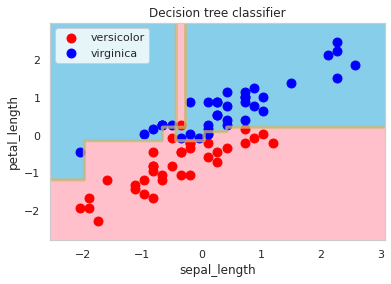

In [33]:
decision_region(
    X_train_standardized, 
    y_train, 
    dt, 
    title="Decision tree classifier", 
    xlabel="sepal_length", 
    ylabel="petal_length"
)

<h4>Random forest</h4>

In [34]:
rf = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train_standardized, y_train)
rf_predict = dt.predict(X_test_standardized)

print("Prediction: \n{}".format(rf_predict))
print("Truth: \n{}".format(y_test))
print("Differences: \n{}\n".format(rf_predict - y_test))

Prediction: 
[2 2 1 1 1 1 2 1 2 2 1 2 2 1 1 1 1 2 1 1 1 2 2 2 2]
Truth: 
[2 2 1 1 1 1 2 1 2 2 1 2 2 1 1 1 1 2 1 1 1 2 2 2 2]
Differences: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]



In [35]:
rf_score = pd.DataFrame({
        'Accuracy': [metrics.accuracy_score(y_test, rf_predict)],
        'Precision': [metrics.precision_score(y_test, rf_predict)],
        'Recall': [metrics.recall_score(y_test, rf_predict)],
        'F1': [metrics.f1_score(y_test, rf_predict)]
})

display(rf_score)
display(metrics.confusion_matrix(y_test, rf_predict))

,Accuracy,Precision,Recall,F1
0,1.0,1.0,1.0,1.0


array([[13,  0],
       [ 0, 12]])

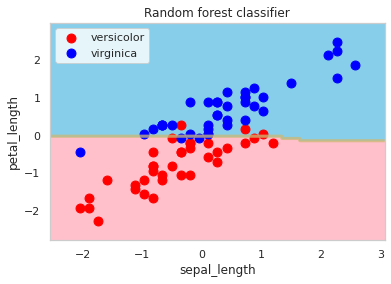

In [36]:
decision_region(
    X_train_standardized, 
    y_train, 
    rf, 
    title="Random forest classifier", 
    xlabel="sepal_length", 
    ylabel="petal_length"
)

<h3>[Problem 9] (Advanced task) Comparison with and without standardization</h3>

<h4>5-negihbors</h4>

In [38]:
neigh_not_std = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
neigh_not_std_predict = neigh_not_std.predict(X_test)

neigh_not_std_score = pd.DataFrame({
        'Accuracy': [metrics.accuracy_score(y_test, neigh_not_std_predict)],
        'Precision': [metrics.precision_score(y_test, neigh_not_std_predict)],
        'Recall': [metrics.recall_score(y_test, neigh_not_std_predict)],
        'F1': [metrics.f1_score(y_test, neigh_not_std_predict)]
})

display(neigh_not_std_score)
display(metrics.confusion_matrix(y_test, neigh_not_std_predict))

,Accuracy,Precision,Recall,F1
0,0.96,0.928571,1.0,0.962963


array([[13,  0],
       [ 1, 11]])

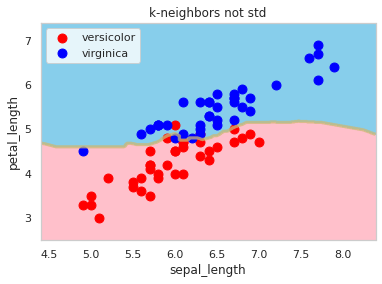

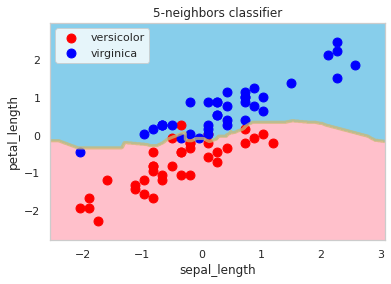

In [39]:
decision_region(
    X_train, 
    y_train, 
    neigh_not_std, 
    title="k-neighbors not std", 
    xlabel="sepal_length", 
    ylabel="petal_length"
)

decision_region(
    X_train_standardized, 
    y_train, 
    KNeighborsClassifier(n_neighbors=5).fit(X_train_standardized, y_train), 
    title="{}-neighbors std".format(5), 
    xlabel="sepal_length", 
    ylabe="petal_length"
)

<h4>Logistic regression</h4>

In [40]:
lr_not_std = LogisticRegression(random_state=0).fit(X_train, y_train)
lr_not_std_predict = lr.predict(X_test)

lr_not_std_score = pd.DataFrame({
        'Accuracy': [metrics.accuracy_score(y_test, lr_not_std_predict)],
        'Precision': [metrics.precision_score(y_test, lr_not_std_predict)],
        'Recall': [metrics.recall_score(y_test, lr_not_std_predict)],
        'F1': [metrics.f1_score(y_test, lr_not_std_predict)]
})

display(lr_not_std_score)
display(metrics.confusion_matrix(y_test, lr_not_std_predict))

/home/goriummaximum/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Accuracy,Precision,Recall,F1
0,0.48,0.0,0.0,0.0


array([[ 0, 13],
       [ 0, 12]])

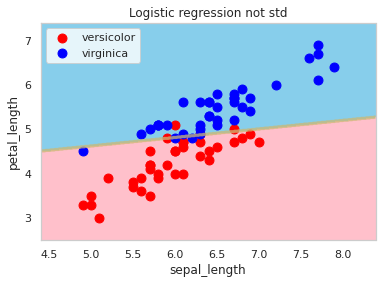

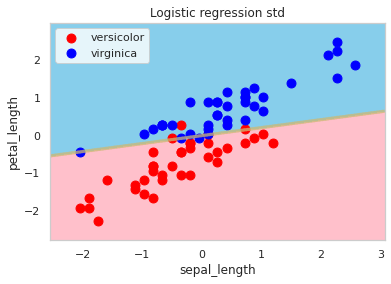

In [42]:
decision_region(
    X_train, 
    y_train, 
    lr_not_std, 
    title="Logistic regression not std", 
    xlabel="sepal_length", 
    ylabel="petal_length"
)

decision_region(
    X_train_standardized, 
    y_train, 
    lr, 
    title="Logistic regression std", 
    xlabel="sepal_length", 
    ylabel="petal_length"
)